<a href="https://colab.research.google.com/github/Rossel/DataQuest_Courses/blob/master/028__Conditional_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COURSE 3/6: STORYTELLING THROUGH DATA VISUALIZATION

# MISSION 4: Conditional_plots

In this mission, we will explore how to create attractive conditional plots using Seaborn.

## 1. Introduction to Seaborn

So far, we've mostly worked with plots that are quick to analyze and make sense of. Line charts, scatter plots, and bar plots allow us to convey a few nuggets of insights to the reader. We've also explored how we can combine those plots in interesting ways to convey deeper insights and continue to extend the storytelling power of data visualization. In this mission, we'll explore how to quickly create multiple plots that are subsetted using one or more conditions.

We'll be working with the seaborn visualization library, which is built on top of matplotlib. [Seaborn](http://seaborn.pydata.org/) has good support for more complex plots, attractive default styles, and integrates well with the pandas library. Here are some examples of some complex plots that can be created using seaborn:

![Seaborn](https://s3.amazonaws.com/dq-content/seaborn_gallery.png)




## 2. Introduction to the Data Set

We'll be working with a data set of the passengers of the Titanic. The [Titanic shipwreck](https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic) is the most famous shipwreck in history and led to the creation of better safety regulations for ships. One substantial safety issue was that there were not enough lifeboats for every passenger on board, which meant that some passengers were prioritized over others to use the lifeboats.

The data set was compiled by [Kaggle](https://www.kaggle.com/c/titanic/data) for their introductory data science competition, called **Titanic: Machine Learning from Disaster**. The goal of the competition is to build machine learning models that can predict if a passenger survives from their attributes. 

The data for the passengers is contained in two files:

- `train.csv`: Contains data on 712 passengers
- `test.csv`: Contains data on 418 passengers

Each row in both data sets represents a passenger on the Titanic, and some information about them. We'll be working with the `train.csv` file, because the `Survived` column, which describes if a given passenger survived the crash, is preserved in the file. The column was removed in `test.csv`, to encourage competitors to practice making predictions using the data. Here are descriptions for each of the columns in `train.csv`:

- `PassengerId` -- A numerical id assigned to each passenger.
- `Survived` -- Whether the passenger survived (`1`), or didn't (`0`).
- `Pclass` -- The class the passenger was in.
- `Name` -- the name of the passenger.
- `Sex` -- The gender of the passenger -- male or female.
- `Age` -- The age of the passenger. Fractional.
- `SibSp` -- The number of siblings and spouses the passenger had on board.
- `Parch` -- The number of parents and children the passenger had on board.
- `Ticket` -- The ticket number of the passenger.
- `Fare` -- How much the passenger paid for the ticket.
- `Cabin` -- Which cabin the passenger was in.
- `Embarked` -- Where the passenger boarded the Titanic.

### **Importing the data**

Let's start by importing the libraries we need and reading the dataset into pandas using Google Colab.


In [2]:
# Import functions from Google modules into Colaboratory
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
# Insert file id from Google Drive shareable link:
# https://drive.google.com/file/d/1vQzWwsOM8Besa36uhMdm3JkiIXeLtJpL/view?usp=sharing
id = "1vQzWwsOM8Besa36uhMdm3JkiIXeLtJpL"

In [4]:
# Download the dataset
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train.csv')

In [5]:
# Import pandas library
import pandas as pd
import numpy as np

The dataset could not be read using "UTF-8" or "Windows-1252" encoding, so we used "Latin-1".

In [6]:
 # Read encoded csv
 titanic = pd.read_csv("train.csv")

### **Exploring the data**
Let's render the first few and last few values of this pandas object, by running the `train` variable in a separate cell.

In [7]:
# Render the first few and last rows of the autos dataframe
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


###**Remove missing values**



Let's remove columns like `Name` and `Ticket` that we don't have a way to visualize. Keep only the following columns:
- `Survived`
- `Pclass`
- `Sex`
- `Age`
- `SibSp`
- `Parch`
- `Fare`
- `Embarked`

In [8]:
print(titanic.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [9]:
# Avoid modifying copies
# https://www.dataquest.io/blog/settingwithcopywarning/
cols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

print(cols)

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


In [10]:
print(titanic.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In addition, we need to remove any rows containing missing values, as **seaborn will throw errors when we try to plot missing values**. We will use the [`DataFrame.dropna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) method to remove rows containing missing values.

Recall that we can use the `DataFrame.isnull()` method to identify missing values, which returns a boolean dataframe. We can then use the DataFrame.sum() method to give us a count of the True values for each column:

In [11]:
print(titanic[cols].isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [12]:
titanic = titanic[cols].dropna()

In [13]:
print(titanic[cols].isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


## 3. Creating Histograms In Seaborn

Seaborn works similarly to the `pyplot` module from matplotlib. We primarily use seaborn interactively, by calling functions in its top level namespace. Like the `pyplot` module from matplotlib, seaborn creates a matplotlib figure or adds to the current, existing figure each time we generate a plot. When we're ready to display the plots, we call `pyplot.show()`.

To get familiar with seaborn, we'll start by creating the familiar histogram. We can generate a histogram of the `Fare` column using the `seaborn.distplot()` function:



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


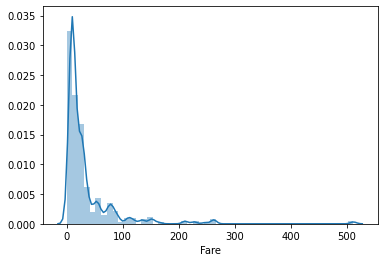

In [14]:
import seaborn as sns    # seaborn is commonly imported as `sns`
import matplotlib.pyplot as plt
sns.distplot(titanic["Fare"])
plt.show()

Under the hood, seaborn creates a histogram using matplotlib, scales the axes values, and styles it. In addition, seaborn uses a technique called kernel density estimation, or KDE for short, to create a smoothed line chart over the histogram. If you're interested in learning about how KDE works, you can read more on [Wikipedia](https://en.wikipedia.org/wiki/Kernel_density_estimation).

What you need to know for now is that the resulting line is a smoother version of the histogram, called a **kernel density plot**. Kernel density plots are especially helpful when we're comparing distributions, which we'll explore later in this mission. When viewing a histogram, our visual processing systems influence us to smooth out the bars into a continuous line.

Now let's have a look at the distrobution of the `Age` column:

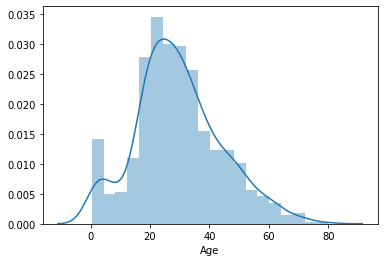

In [15]:
sns.distplot(titanic["Age"])
plt.show()

## 4. Generating A Kernel Density Plot

While having both the histogram and the kernel density plot is useful when we want to explore the data, it can be overwhelming for someone who's trying to understand the distribution. 

To generate just the kernel density plot, we use the [`seaborn.kdeplot()`](http://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot) function:

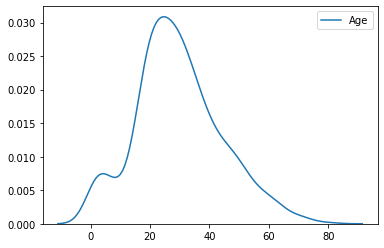

In [16]:
sns.kdeplot(titanic["Age"])
plt.show()

While the distribution of data is displayed in a smoother fashion, it's now more difficult to visually estimate the area under the curve using just the line chart. When we also had the histogram, the bars provided a way to understand and compare proportions visually.

To bring back some of the ability to easily compare proportions, we can shade the area under the line using a single color. When calling the `seaborn.kdeplot()` function, we can shade the area under the line by setting the `shade` parameter to `True`.

Instructions:
- Generate a kernel density plot:
  - Using the values in the `"Age"` column
  - With the area under the curve shaded
- Set the x-axis label to `"Age"` using `pyplot.xlabel()`.

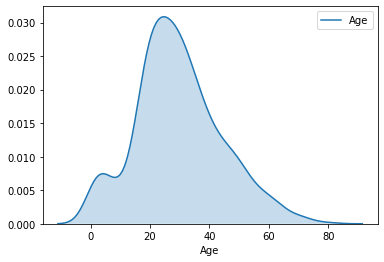

In [17]:
sns.kdeplot(titanic["Age"], shade=True)
plt.xlabel("Age")
plt.show()

##5. Modifying The Appearance Of The Plots

From the plots in the previous step, you'll notice that seaborn:

- Sets the x-axis label based on the column name passed through `plt.xlabel()` function
- Sets the background color to a light gray color
- Hides the x-axis and y-axis ticks
- Displays the coordinate grid

In the last few missions, we explored some general aesthetics guidelines for plots. The default seaborn style sheet gets some things right, like hiding axis ticks, and some things wrong, like displaying the coordinate grid and keeping all of the axis spines. We can use the [`seaborn.set_style()`](http://seaborn.pydata.org/generated/seaborn.set_style.html#seaborn.set_style) function to change the default seaborn style sheet. Seaborn comes with a few style sheets:

- `darkgrid`: Coordinate grid displayed, dark background color
- `whitegrid`: Coordinate grid displayed, white background color
- `dark`: Coordinate grid hidden, dark background color
- `white`: Coordinate grid hidden, white background color
- `ticks`: Coordinate grid hidden, white background color, ticks visible

Here's a diagram that compares the same plot across all styles:
![img](https://s3.amazonaws.com/dq-content/seaborn_all_styles.png)


By default, the seaborn style is set to `darkgrid`:
`sns.set_style("darkgrid")`

If we change the style sheet using this method, all future plots will match that style in your current session. This means you need to set the style before generating the plot.

To **remove the axis spines** for the top and right axes, we use the `seaborn.despine()` function:

`sns.despine()`

By default, only the top and right axes will be despined, or have their spines removed. To despine the other two axes, we need to set the `left` and `bottom` parameters to `True`.


Instructions:

- Set the style to the style sheet that hides the coordinate grid and sets the background color to white.
- Generate a kernel density plot of the `Age` column, with the area under the curve shaded.
- Set the x-axis label to `Age`.
- Despine all of the axes.


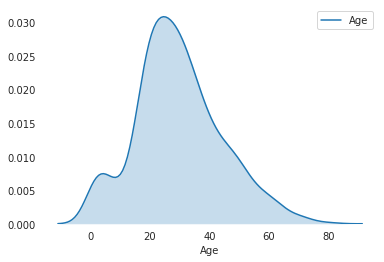

In [18]:
sns.set_style("white")
sns.kdeplot(titanic["Age"], shade=True)
plt.xlabel("Age")
sns.despine(left=True, bottom=True)
plt.show()

## 6. Conditional Distributions Using A Single Condition

In the last few missions, we created a [small multiple](https://en.wikipedia.org/wiki/Small_multiple), which is a group of plots that have the same axis scales so the viewer can compare plots effectively. We accomplished this by subsetting the data manually and generating a plot using matplotlib for each one.

In seaborn, we can create a small multiple by specifying the conditioning criteria and the type of data visualization we want. For example, we can visualize the differences in age distributions between passengers who survived and those who didn't by creating a pair of kernel density plots. One kernel density plot would visualize the distribution of values in the `"Age"` column where `Survived` equalled `0` and the other would visualize the distribution of values in the `"Age"` column where `Survived` equalled `1`.

Here's what those plots look like:



/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


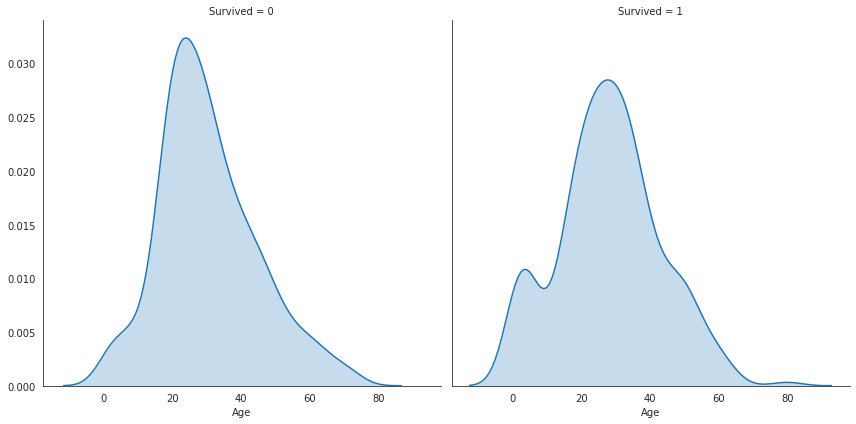

In [19]:
# Condition on unique values of the "Survived" column.
g = sns.FacetGrid(titanic, col="Survived", size=6)
# For each subset of values, generate a kernel density plot of the "Age" columns.
g.map(sns.kdeplot, "Age", shade=True)

Seaborn handled:

- subsetting the data into rows where `Survived` is `0` and where `Survived` is `1`
- creating both Axes objects, ensuring the same axis scales
- plotting both kernel density plots

Instead of subsetting the data and generating each plot ourselves, seaborn allows us to express the plots we want as parameter values. The `seaborn.FacetGrid` object is used to represent the layout of the plots in the grid and the columns used for subsetting the data. The word "facet" from `FacetGrid` is another word for "subset". Setting the `col` parameter to `"Survived"` specifies a separate plot for each unique value in the `Survived` column. Setting the `size` parameter to `6` specifies a height of 6 inches for each plot.

Once we've created the grid, we use the `FacetGrid.map()` method to specify the plot we want for each unique value of `Survived`. Seaborn generated one kernel density plot for the ages of passengers that survived and one kernel density plot for the ages of passengers that didn't survive.

The function that's passed into `FacetGrid.map()` has to be a valid matplotlib or seaborn function. For example, we can map matplotlib histograms to the grid:

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


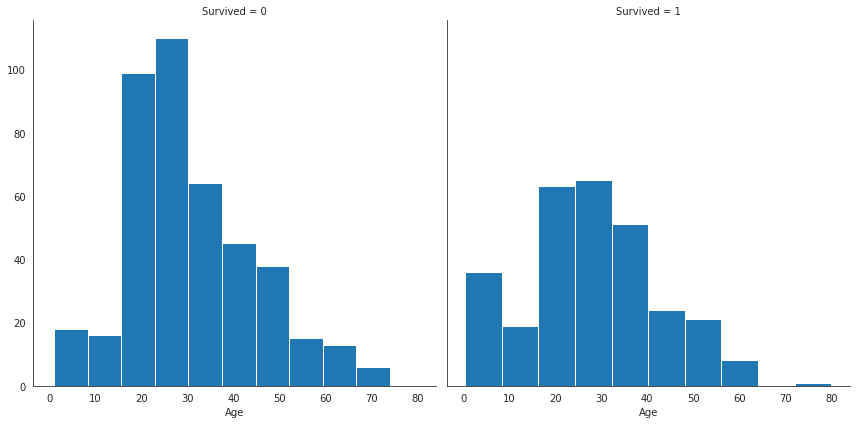

In [21]:
g = sns.FacetGrid(titanic, col="Survived", size=6)
g.map(plt.hist, "Age")

##7. Creating Conditional Plots Using Two Conditions

We can use two conditions to generate a grid of plots, each containing a subset of the data with a unique combination of each condition. When creating a `FacetGrid`, we use the `row` parameter to specify the column in the dataframe we want used to subset across the rows in the grid. The best way to understand this is to see a working example.

The starter code subsets the dataframe on different combinations of unique values in both the `Pclass` and `Survived` columns. Try changing the conditions to see the resulting plots.

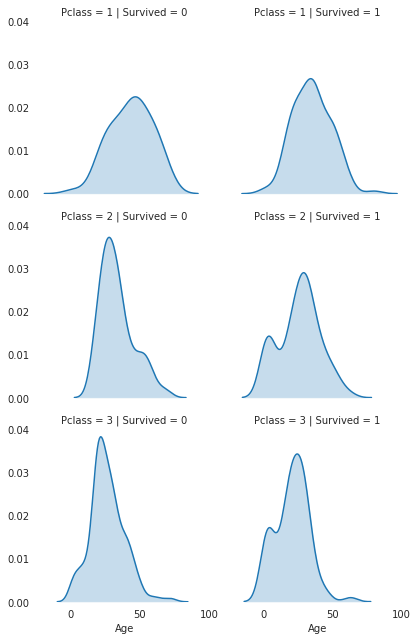

In [20]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass")
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()